In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from goofit import *
import matplotlib.pyplot as plt
import numpy as np
import goofit as gf
import sys
%matplotlib inline


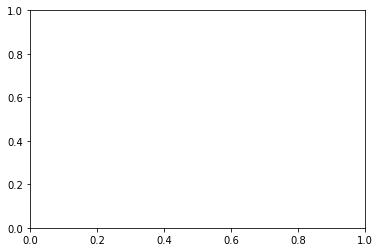

In [2]:
fig,ax = plt.subplots(figsize=(6,4))

In [3]:
_mD0       = 1.86484
_mD02      = _mD0 * _mD0
_mD02inv   = 1. / _mD02
piPlusMass = 0.13957018
piZeroMass = 0.1349766

m12 = Observable("m12", 0, 3)
m13 = Observable("m13", 0, 3)
m12.numbins = 240
m13.numbins = 240
eventNumber = EventNumber("eventNumber")


mass1 = Variable("m1", 1.08, 0.01, 0.1, 2.7)
width1 = Variable("w1", 0.01, 0.01, 0.0001, 0.2)
mass2 = Variable("m2", 0.8, 0.01, 0.1, 2.7)
width2 = Variable("w2", 0.15, 0.01, 0.0001, 0.2)
ar1=Variable("ar1", 0.565, 0.001, 0, 0)
ai1=Variable("ai1", 0.565, 0.001, 0, 0)
ar2=Variable("ar2", 0.565, 0.001, 0, 0)
ai2=Variable("ai2", 0.565, 0.001, 0, 0)
def makeSignalPdf(m12, m13, eventNumber, eff = None, fitMasses = False):

    constantOne  = Variable("constantOne", 1)
    constantZero = Variable("constantZero", 0)


    dtop0pp = DecayInfo3()
    dtop0pp.motherMass   = _mD0
    dtop0pp.daug1Mass    = piZeroMass
    dtop0pp.daug2Mass    = piPlusMass
    dtop0pp.daug3Mass    = piPlusMass
    dtop0pp.meson_radius = 1.5




    rho1 = Resonances.RBW("rhom",
                        ar1,
                        ai1,
                        mass1,
                        width1,
                        1,
                        PAIR_12)

    rho2 = Resonances.RBW("rho0",
                        ar2,
                        ai2,
                        mass2,
                        width2,
                        1,
                        PAIR_13)

    dtop0pp.resonances = (rho1,rho2)

    if not fitMasses:
        for res in dtop0pp.resonances:
            res.setParameterConstantness(False)

    if not eff:
# By default create a constant efficiency.
        observables = (m12,m13,)
        offsets = (constantZero,constantZero,)
        coefficients = (constantOne,)
        eff = PolynomialPdf("constantEff", observables, coefficients, offsets, 0)

    d = Amp3Body("signalPDF", m12, m13, eventNumber, dtop0pp, eff)
    return d


In [4]:
def f(a,b,m1,w1,m2,w2):
    ar1.value=np.cos(a)
    ai1.value=np.sin(a)
    ar2.value=np.cos(b)
    ai2.value=np.sin(b)
    mass1.value=m1
    width1.value=w1
    mass2.value=m2
    width2.value=w2

    signal =makeSignalPdf(m12,m13,eventNumber)
    prodpdf=ProdPdf("prodpdf",[signal])
    dplt=gf.DalitzPlotter(prodpdf,signal)

    arr=dplt.make2D()
    extent = dplt.getExtent()
    arr=np.ma.array(arr,mask=arr==0)
    ax.clear()
    plt.imshow(arr,extent=extent,origin='lower')
    plt.colorbar(cax=None,ax=None,shrink=0.5)

    plt.savefig('RBW_pdf_plot.png')
    plt.show()
    return(a,b,m1,w1,m2,w2)



In [5]:
interact(f,a=3.0,b=3.0,m1=3.0,w1=0.5,m2=3.0,w2=0.5);

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTMuMCwgZGVzY3JpcHRpb249dSdhJywgbWF4PTkuMCwgbWluPS0zLjApLCBGbG9hdFNsaWRlcih2YWx1ZT0zLjAsIGRlc2PigKY=
